# Support Vector Machine
* Works well for classifying higher dimentional data (i.e many features)
* Finds the higher-dimentional support vectors (*hyperplane*) accross which to divide the data
* Uses **kernel trick** to represent data in higher dimentional spaces to find hyperplane that might not be apparent in lower dimensions.
* **a supervised learning technique** 

### Create the same fake income / age clustered data that we used for our K-Means clustering

In [1]:
import numpy as np

#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    pointsPerCluster = float(N)/k
    X = []
    y = []
    for i in range (k):
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        ageCentroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

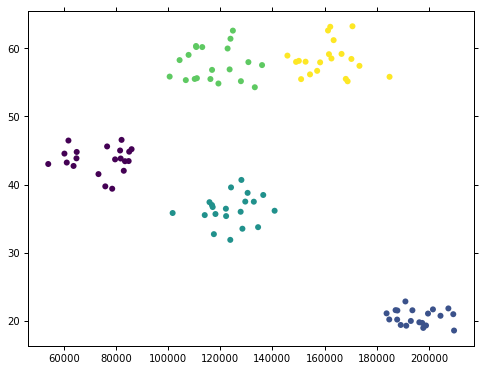

In [5]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt


(X, y) = createClusteredData(100, 5)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

### Use linear SVC to partition our graph into clusters:

In [6]:
from sklearn import svm, datasets

C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

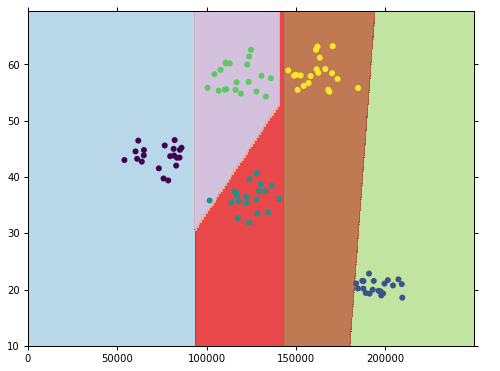

In [7]:
def plotPredictions(clf):
    xx, yy = np.meshgrid(np.arange(0, 250000, 10),
                     np.arange(10, 70, 0.5))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
    plt.show()
    
plotPredictions(svc)

In [8]:
svc.predict([[200000, 40]])

array([1])

In [9]:
svc.predict([[50000, 65]])

array([0])